# Project 2 : Investigate Gapminder Dataset

I choose to use [Gapminder](https://www.gapminder.org/) data to investigate child mortality.

To view how it change accros the world and what metric his correlated to it.

I download the following data :
*   age_at_1st_marriage_women.csv
*   child_mortality_0_5_year_olds_dying_per_1000_born.csv
*   children_per_woman_total_fertility.csv
*   gnipercapita_atlasmethod_current_us.csv
*   hdi_human_development_index.csv
*   income_per_person_gdppercapita_ppp_inflation_adjusted.csv
*   internal_renewable_water_cu_meters_per_person.csv
*   life_expectancy_years.csv
*   mean_years_in_school_women_of_reproductive_age_15_to_44.csv
*   number_of_people_in_poverty.csv
*   population_total.csv
*   working_hours_per_week.csv


Let's initialize the Notebook :

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


Importing the Python modules

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

I choose to discover Google Colab for this project and store the CSV in my Google Drive.

So I first need to connect the Colab to my Drive :

In [60]:
# Connect to Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


First I load the CSV of the child motality.

Then I keep only the year 2005 as this year is common in others dataset.

And I do a quick analysis of the dataset.


In [61]:
df_child_mortality = pd.read_csv("gdrive/My Drive/Udacity/child_mortality_0_5_year_olds_dying_per_1000_born.csv", sep=',', index_col=False, )
df_child_mortality.head(2)


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,94.1,90.2,86.4,82.8,79.3,76.1,73.2,70.4,68.2,65.9
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,17.2,16.6,16.0,15.4,14.9,14.4,14.0,13.5,13.3,12.9


In [62]:
# Keep only 2005
df_child_mortality = df_child_mortality[['country', '2005']]
df_child_mortality.columns = ['country', 'mortality']
df_child_mortality.sort_values(by=['mortality'], ascending=False, inplace=True)
print("Countries with most mortality :")
df_child_mortality.head()
print("Countries with fewest mortality :")
df_child_mortality.tail()
print("Summary of data :")
df_child_mortality.describe()

Countries with most mortality :


,country,mortality
149,Sierra Leone,204.0
154,Somalia,174.0
103,Mali,172.0
123,Niger,172.0
33,Chad,169.0


Countries with fewest mortality :


,country,mortality
83,Japan,3.7
166,Sweden,3.6
97,Luxembourg,3.5
74,Iceland,3.1
150,Singapore,3.0


Summary of data :


,mortality
count,193.000000
mean,46.857513
std,47.525740
min,3.000000
25%,10.500000
50%,25.300000
75%,74.300000
max,204.000000


We saw a huge difference between min and max, and the standard deviation is quite equal to the mean, showing that there is huge difference between countries across the world.

A child that born in Singapore in 2005 have 68 more chances to live above 5y/o than one born in Sierra Leone 	!

Let's also plot a "regplot" with Seeborn as it is a quick solution to view the datas.

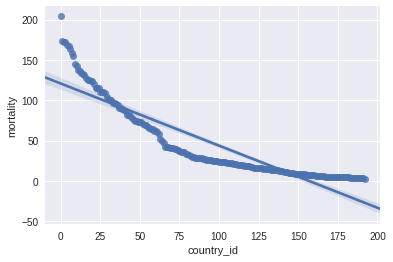

In [87]:
# Reset the index
df_child_mortality = df_child_mortality.reset_index(drop=True)
# Create a country_id column
df_child_mortality['country_id'] = df_child_mortality.index.get_level_values(0)
# Plot the graph, with the linear regression line.
sns.regplot(x="country_id" , y = "mortality", data=df_child_mortality);


Mortality is low for half of the world (right of the graph) then it increase fast (left of the plot).

Let's compute the quantils with list of countries in them :

In [64]:
prev = 0
quantils = []
for i in range(1,11,1):
  quantil_value = df_child_mortality.quantile(i/10)[0]
  countries_list = df_child_mortality.query("mortality > @prev and mortality <= @quantil_value")[['country']].values
  # remove unwanted sublevel of the list
  countries_list = [item for sublist in countries_list for item in sublist]
  nb_of_countries = len(countries_list)
  print("Quantil", i/10, "is above", prev, "and as a max of", quantil_value , "and include ", nb_of_countries," countries :",countries_list )
  quantils.append(quantil_value)
  prev = quantil_value



Quantil 0.1 is above 0 and as a max of 4.9 and include  21  countries : ['Cyprus', 'Austria', 'Denmark', 'Portugal', 'Spain', 'Germany', 'Greece', 'France', 'Italy', 'Monaco', 'Czech Republic', 'San Marino', 'Slovenia', 'Norway', 'Andorra', 'Finland', 'Japan', 'Sweden', 'Luxembourg', 'Iceland', 'Singapore']
Quantil 0.2 is above 4.9 and as a max of 8.14 and include  18  countries : ['Malaysia', 'United States', 'Hungary', 'Poland', 'Estonia', 'Malta', 'Cuba', 'Croatia', 'New Zealand', 'Canada', 'United Kingdom', 'Australia', 'Israel', 'South Korea', 'Netherlands', 'Ireland', 'Switzerland', 'Belgium']
Quantil 0.3 is above 8.14 and as a max of 14.02 and include  19  countries : ['Russia', 'Macedonia, FYR', 'Bulgaria', 'Oman', 'Antigua and Barbuda', 'Kuwait', 'Brunei', 'Montenegro', 'Bahrain', 'Latvia', 'Costa Rica', 'Qatar', 'United Arab Emirates', 'Chile', 'Lithuania', 'Serbia', 'Bosnia and Herzegovina', 'Belarus', 'Slovak Republic']
Quantil 0.4 is above 14.02 and as a max of 19.40000000

Child mortality stay low for the first quantil but goes really high for the latest. In the last two quantils almost 1 child on 10 never get to 5 years ! And in the last quantil it's 1 child on 5 that died before 5 y/o.

In Singapore it's 1 child of 333 that died before 5.

Let's plot the quantils max value :


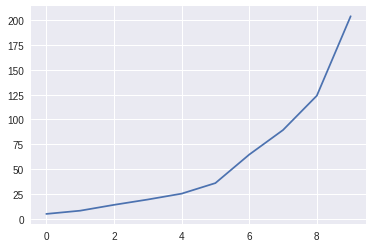

In [65]:
plt.plot(quantils);

The mortality increase almost exponentialy across quantils.

I'd like to compare this indicator to other metrics avalable in Gapminder, like age of first mariage or education, to view if there is a like between them.

I preprare a function to do the same process on all files.

In [0]:
import seaborn as sns
def prepare_data(df, col_name, year = '2005', show_stat = False):
  #df.head(3)
  # Keep only one year
  df = df[['country', year]]
  df.columns = ['country', col_name]
  df = df.dropna()
  df.sort_values(by=[col_name], ascending=True, inplace=True)
  if show_stat :
    print("Countries with lowest ", col_name, ":")
    print(df.head())
    print("Countries with highest ", col_name, ":")
    print(df.tail())
    print("Summary of data :")
    print(df.describe())
  df = df.reset_index(drop=True)
  df['country_id'] = df.index.get_level_values(0)
  sns.regplot(x="country_id" , y = col_name, data=df[['country_id', col_name]], order=2, line_kws={"color": "red"});
  return df

Then I load each file individualy, analyse it and plot it.

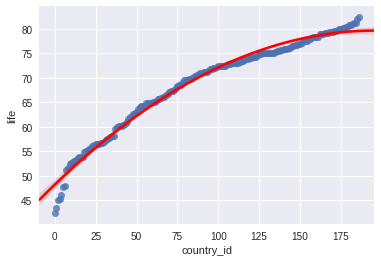

In [67]:
df_live = pd.read_csv("gdrive/My Drive/Udacity/life_expectancy_years.csv", sep=',', index_col=False, )
df_live = prepare_data(df_live, 'life')
#df_live.head(2)


Living in Andorra or Japan you could expend to live almost twice longer than in Swaziland !

I also build a method to compute quantils.



In [0]:
def compute_quantils(df, col_name, print_data=False):
  prev = 0
  quantils = []
  for i in range(1,11,1):
    quantil_value = df.quantile(i/10)[0]
    # Get the names of countries in the quantil
    countries_list = df.query(col_name + " > @prev and " + col_name + " <= @quantil_value")[['country']].values
    # remove unwanted sublevel of the list
    countries_list = [item for sublist in countries_list for item in sublist]
    nb_of_countries = len(countries_list)
    if print_data:
      print("Quantil", i/10, "is above", prev, "and as a max of", quantil_value , "and include ", nb_of_countries," countries :",countries_list )
    quantils.append(quantil_value)
    prev = quantil_value
  return quantils

Quantil 0.1 is above 0 and as a max of 55.02 and include  19  countries : ['Swaziland', 'Lesotho', 'Central African Republic', 'Zimbabwe', 'Zambia', 'Malawi', 'Botswana', 'South Africa', 'Namibia', 'Mozambique', 'Sierra Leone', 'Uganda', 'Burundi', 'Guinea-Bissau', "Cote d'Ivoire", 'Chad', 'Afghanistan', 'Somalia', 'Cameroon']
Quantil 0.2 is above 55.02 and as a max of 59.6 and include  19  countries : ['Burkina Faso', 'Tanzania', 'Congo, Dem. Rep.', 'Niger', 'Ethiopia', 'Guinea', 'Togo', 'Mali', 'Angola', 'South Sudan', 'Congo, Rep.', 'Nigeria', 'Kenya', 'Papua New Guinea', 'Rwanda', 'Haiti', 'Equatorial Guinea', 'Liberia', 'Benin']
Quantil 0.3 is above 59.6 and as a max of 64.69999999999999 and include  18  countries : ['Gabon', 'Madagascar', 'Ghana', 'Kiribati', 'Lao', 'Eritrea', 'Solomon Islands', 'Senegal', 'Djibouti', 'Vanuatu', 'Pakistan', 'Cambodia', 'Marshall Islands', 'Myanmar', 'Mongolia', 'India', 'Comoros', 'Gambia']
Quantil 0.4 is above 64.69999999999999 and as a max of 6

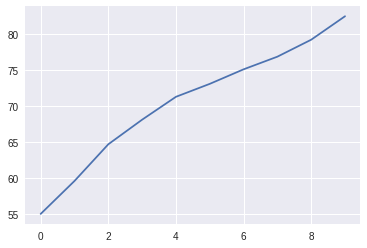

In [69]:
quantils = compute_quantils(df_live, 'life', print_data=True)
plt.plot(quantils);

Life expectency is quite linear. We could compare it to child mortality, it's probably  related because if you save childrens you probably also help the elders to live longuer.

Let's try with date of first mariage.

Countries with lowest  first_marriage :
                   country  first_marriage
107                  Niger            17.6
125  Sao Tome and Principe            17.8
0              Afghanistan            17.8
29                    Chad            18.3
91                    Mali            18.5
Countries with highest  first_marriage :
       country  first_marriage
109     Norway            31.6
12    Barbados            31.8
138  St. Lucia            32.3
143     Sweden            32.4
72     Jamaica            33.2
Summary of data :
       first_marriage
count      158.000000
mean        24.201266
std          3.607335
min         17.600000
25%         21.700000
50%         23.350000
75%         26.475000
max         33.200000


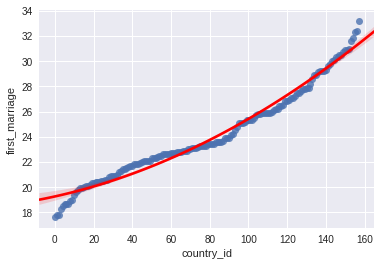

In [70]:
df_1st_marriage = pd.read_csv("gdrive/My Drive/Udacity/age_at_1st_marriage_women.csv", sep=',', index_col=False, )
df_1st_marriage = prepare_data(df_1st_marriage, 'first_marriage', show_stat = True)
#quantils = compute_quantils(df_1st_marriage, 'first_marriage')
# df_1st_marriage.head(2)
# df_1st_marriage.tail(2)
#plt.plot(quantils)

Here the difference is quite the same as life expectency.


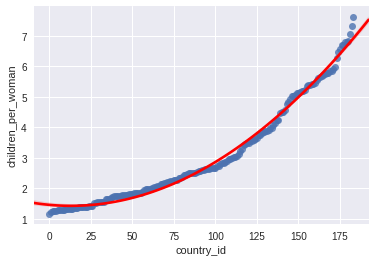

In [71]:
df_children_per_woman = pd.read_csv("gdrive/My Drive/Udacity/children_per_woman_total_fertility.csv", sep=',', index_col=False, )
df_children_per_woman = prepare_data(df_children_per_woman, 'children_per_woman')
#quantils = compute_quantils(df_children_per_woman, 'children_per_woman')
#plt.plot(quantils)

In South Korea, women almost only have one child. While in Niger they give bearth up to 7 in average.
It will be interesting to compare this to mortality.

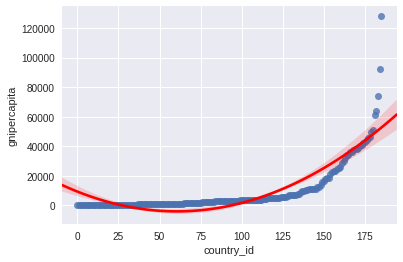

In [72]:
df_gnipercapita = pd.read_csv("gdrive/My Drive/Udacity/gnipercapita_atlasmethod_current_us.csv", sep=',', index_col=False, )
df_gnipercapita = prepare_data(df_gnipercapita, 'gnipercapita')
#quantils = compute_quantils(df_gnipercapita, 'gnipercapita')
#plt.plot(quantils)

Here the disproportion of rich vs poor is clear : there is some very rich and a vast majority of really poor.

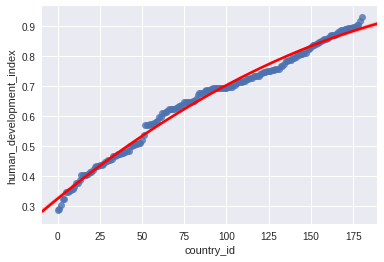

In [73]:
df_human_development_index = pd.read_csv("gdrive/My Drive/Udacity/hdi_human_development_index.csv", sep=',', index_col=False )
df_human_development_index = prepare_data(df_human_development_index, 'human_development_index')
#quantils = compute_quantils(df_human_development_index, 'human_development_index')
#plt.plot(quantils)

The graph is quite linear but maybe it's due to how the human development index is calculated.

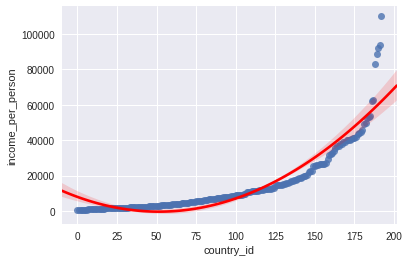

In [74]:
df_income_per_person = pd.read_csv("gdrive/My Drive/Udacity/income_per_person_gdppercapita_ppp_inflation_adjusted.csv", sep=',', index_col=False )
df_income_per_person = prepare_data(df_income_per_person, 'income_per_person')
#quantils = compute_quantils(df_income_per_person, 'income_per_person')
#plt.plot(quantils)

Here we saw the same disproportion of rich vs poor : The difference between GNI and GDP is explained here http://www.differencebetween.net/business/difference-between-gni-and-gdp/

Countries with lowest  water_cu_meters_per_person :
                  country  water_cu_meters_per_person
87                 Kuwait                         0.0
12                Bahrain                         3.9
51                  Egypt                        23.2
170  United Arab Emirates                        25.0
131                 Qatar                        47.5
Countries with highest  water_cu_meters_per_person :
              country  water_cu_meters_per_person
19             Bhutan                    114000.0
125  Papua New Guinea                    125000.0
154          Suriname                    198000.0
70             Guyana                    323000.0
74            Iceland                    557000.0
Summary of data :
       water_cu_meters_per_person
count                  179.000000
mean                 17950.980447
std                  53380.982107
min                      0.000000
25%                   1110.000000
50%                   2780.000000
75%            

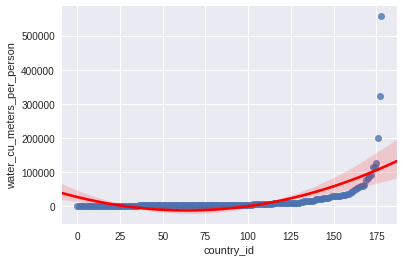

In [88]:
df_water_cu_meters_per_person = pd.read_csv("gdrive/My Drive/Udacity/internal_renewable_water_cu_meters_per_person.csv", sep=',', index_col=False)
#df_water_cu_meters_per_person.head()
# There is no data in 2005 so we took 2007
df_water_cu_meters_per_person = prepare_data(df_water_cu_meters_per_person, 'water_cu_meters_per_person', '2007', show_stat=True)
#quantils = compute_quantils(df_water_cu_meters_per_person, 'water_cu_meters_per_person')
#plt.plot(quantils)

The standart deviation is realy high for water per person. There are huge inequality. Will it be a cause of child mortality ?

Countries with lowest  years_in_school_women :
          country  years_in_school_women
0     Afghanistan                    0.6
111         Niger                    1.1
29           Chad                    1.3
22   Burkina Faso                    1.4
95           Mali                    1.4
Countries with highest  years_in_school_women :
           country  years_in_school_women
40          Cyprus                   13.2
165  United States                   13.4
141    South Korea                   13.7
113         Norway                   13.9
26          Canada                   14.4
Summary of data :
       years_in_school_women
count             174.000000
mean                8.391379
std                 3.600913
min                 0.600000
25%                 5.275000
50%                 9.150000
75%                11.500000
max                14.400000


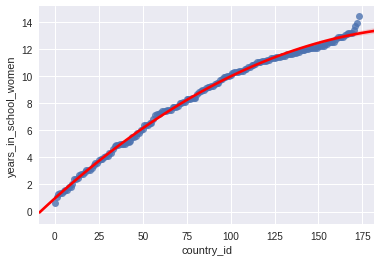

In [90]:
df_years_in_school_women = pd.read_csv("gdrive/My Drive/Udacity/mean_years_in_school_women_of_reproductive_age_15_to_44.csv", sep=',', index_col=False, )
df_years_in_school_women = prepare_data(df_years_in_school_women, 'years_in_school_women', show_stat=True)
#quantils = compute_quantils(df_years_in_school_women, 'years_in_school_women')
#plt.plot(quantils)

I was not expecting a so huge inequality. Women in some country probably don't go to school at all outside cities. 

But I've not found a clear explaination of what is considered as school because the max is 14 years. So they sure don't count infant school.

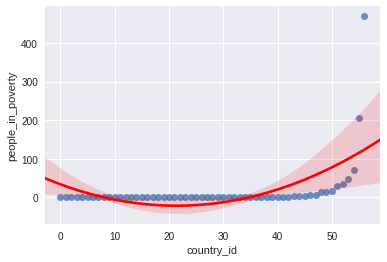

In [77]:

df_people_in_poverty = pd.read_csv("gdrive/My Drive/Udacity/number_of_people_in_poverty.csv", sep=',', index_col=False, )
df_people_in_poverty = prepare_data(df_people_in_poverty, 'people_in_poverty')
#quantils = compute_quantils(df_people_in_poverty, 'people_in_poverty')
#plt.plot(quantils)

This metric is not useful because it's a number of people so it depends on the people in the country !

To use it it is necessary to divide it by the total population of the country.

Countries with lowest  working_hours :
             country  working_hours
89       Philippines           15.7
37          Ethiopia           29.6
79       Netherlands           32.0
24  Congo, Dem. Rep.           34.6
4          Australia           34.7
Countries with highest  working_hours :
         country  working_hours
106  South Korea           48.1
65      Malaysia           48.2
88          Peru           48.4
3        Armenia           48.7
115       Turkey           51.4
Summary of data :
       working_hours
count      57.000000
mean       39.726316
std         5.317408
min        15.700000
25%        37.100000
50%        40.100000
75%        42.100000
max        51.400000


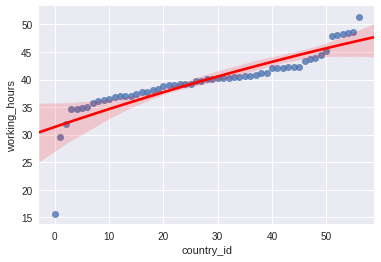

In [91]:
df_working_hours = pd.read_csv("gdrive/My Drive/Udacity/working_hours_per_week.csv", sep=',', index_col=False, )
df_working_hours = prepare_data(df_working_hours, 'working_hours', show_stat=True)
#quantils = compute_quantils(df_working_hours, 'working_hours')
#plt.plot(quantils)

Working hours is the metrics with the less differences between countries. The value for Philippines must be ignored because it's not true considering what we could read in https://en.wikipedia.org/wiki/Labor_policy_in_the_Philippines : The legal working hours are 48 hours per week.

# Merge Dataset
Copy-paste code with only small change is not what a dev id supposed to do. Let's put all our dataset in an array and use the array to do the same thing on every dataset.

In [79]:
df_child = df_child_mortality.drop('country_id', axis=1)
df_child["country_mortality"] = df_child["country"] + ' ' + df_child["mortality"].map(str)
df_child = df_child.set_index('country')
#df_child = df_child.drop('country_id', axis=1)

#df_child.head(3)

datasets = [["df_child_mortality", "mortality"],["df_live", "life"],["df_1st_marriage", 'first_marriage'],
           ["df_children_per_woman", 'children_per_woman'],["df_gnipercapita", 'gnipercapita'],
            ["df_human_development_index", 'human_development_index'], ["df_income_per_person", 'income_per_person'],
            ["df_water_cu_meters_per_person", 'water_cu_meters_per_person'], ["df_years_in_school_women", 'years_in_school_women'],
            ["df_people_in_poverty", 'people_in_poverty'], ["df_working_hours", 'working_hours']
           ]
datasets = [["df_child_mortality", "mortality"]]
datasets = [["df_live", "life"]]

datasets = [["df_live", "life"],["df_1st_marriage", 'first_marriage'],
           ["df_children_per_woman", 'children_per_woman'],["df_gnipercapita", 'gnipercapita'],
            ["df_human_development_index", 'human_development_index'], ["df_income_per_person", 'income_per_person'],
            ["df_water_cu_meters_per_person", 'water_cu_meters_per_person'], ["df_years_in_school_women", 'years_in_school_women'],
            ["df_people_in_poverty", 'people_in_poverty'], ["df_working_hours", 'working_hours']
           ]
df_all = df_child
for ds in datasets:
  df = eval(ds[0])
  df = df.drop('country_id', axis=1)
  df = df.set_index('country')
  #df.head(1)
  #df_all = df_all.merge(df, left_on='country', right_on='country', how='left')
  # join is like a merge on index with left join
  df_all = df_all.join(df)

df_all.head(3)

,mortality,country_mortality,life,first_marriage,children_per_woman,gnipercapita,human_development_index,income_per_person,water_cu_meters_per_person,years_in_school_women,people_in_poverty,working_hours
country,,,,,,,,,,,,
Sierra Leone,204.0,Sierra Leone 204.0,52.5,19.8,5.86,290.0,0.348,1050,29700.0,2.0,NaN,NaN
Somalia,174.0,Somalia 174.0,53.9,NaN,7.31,NaN,NaN,616,674.0,1.5,NaN,NaN
Mali,172.0,Mali 172.0,56.5,18.5,6.79,460.0,0.350,1760,4360.0,1.4,NaN,NaN


Pandas has a useful function to plot all the features in one graph to compare them one to one.

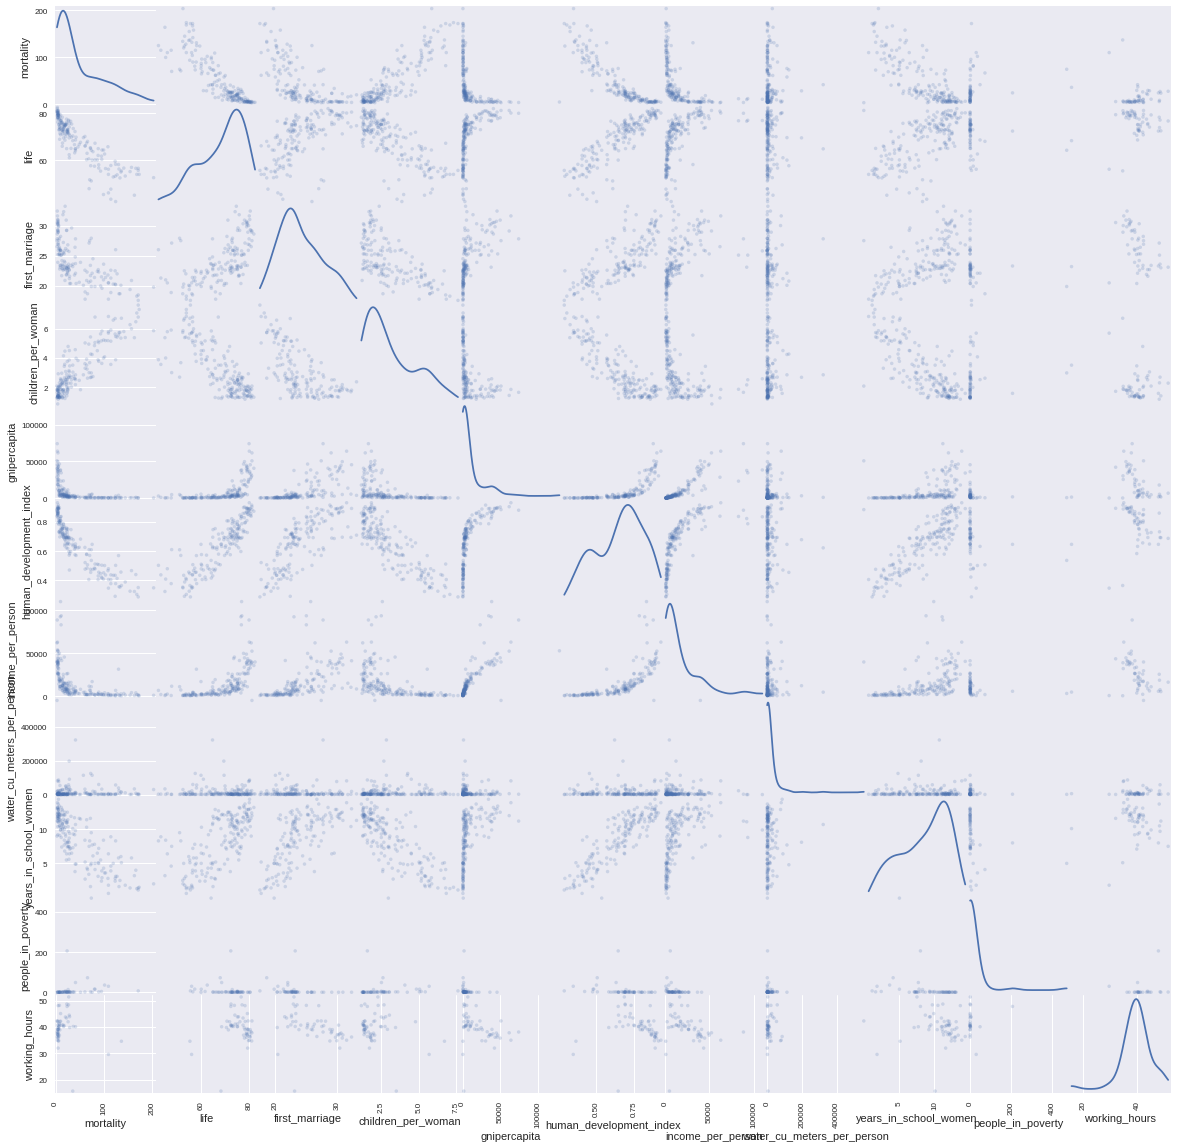

In [80]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_all, alpha=0.2, figsize=(20, 20), diagonal='kde');

It's not easy to read but give a quick view to what to look into.

Let's plot only child mortality vs all the other features.

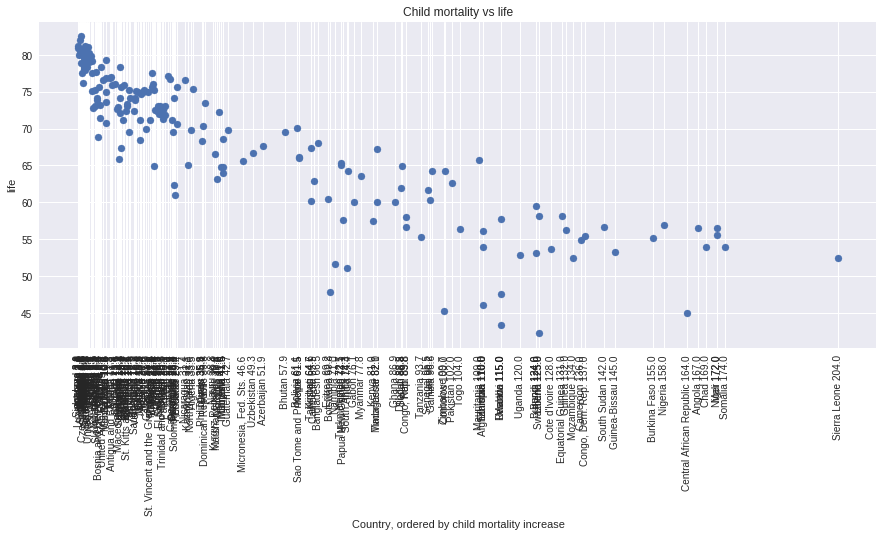

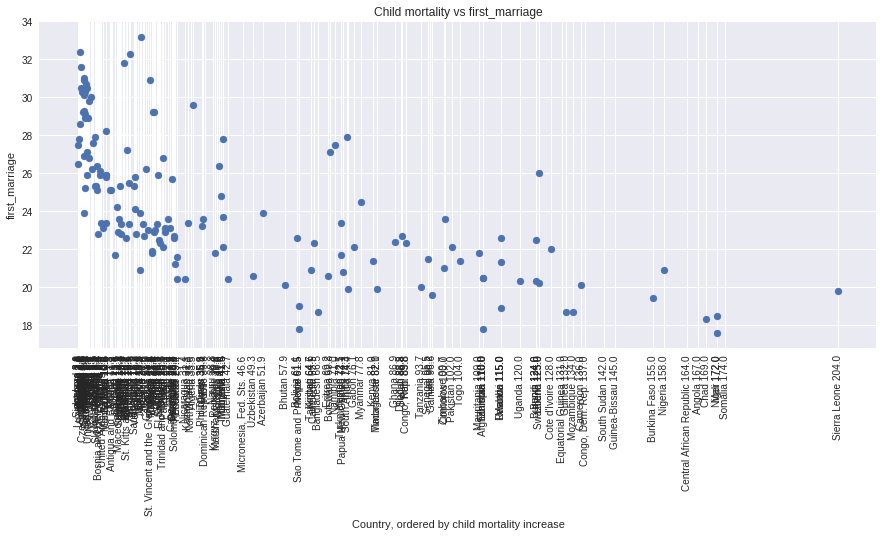

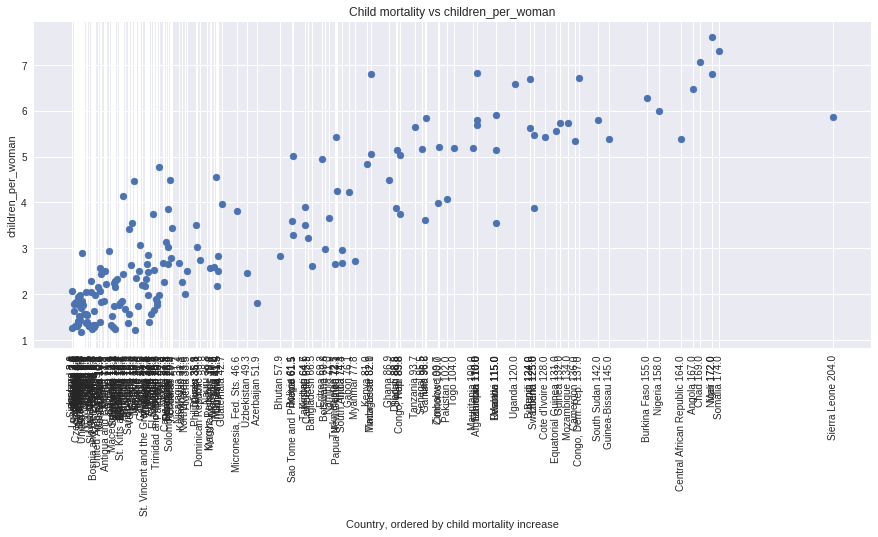

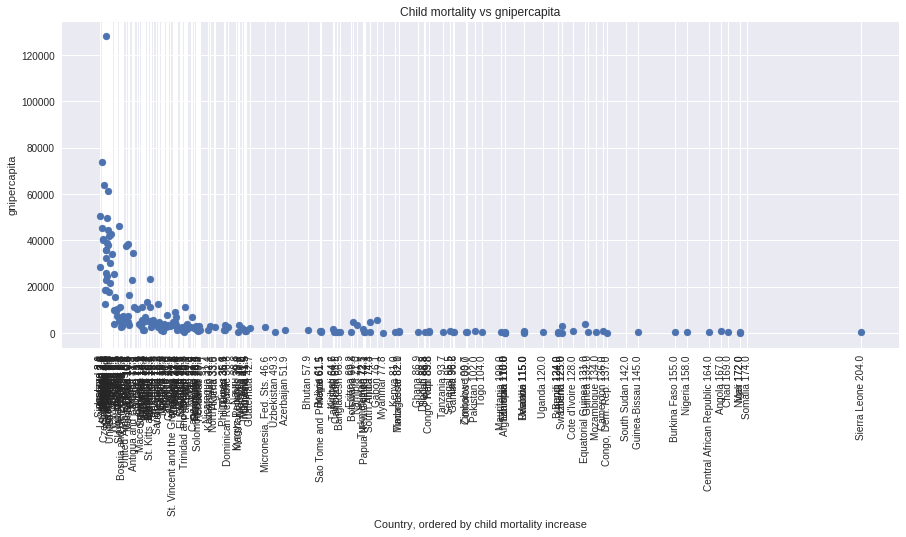

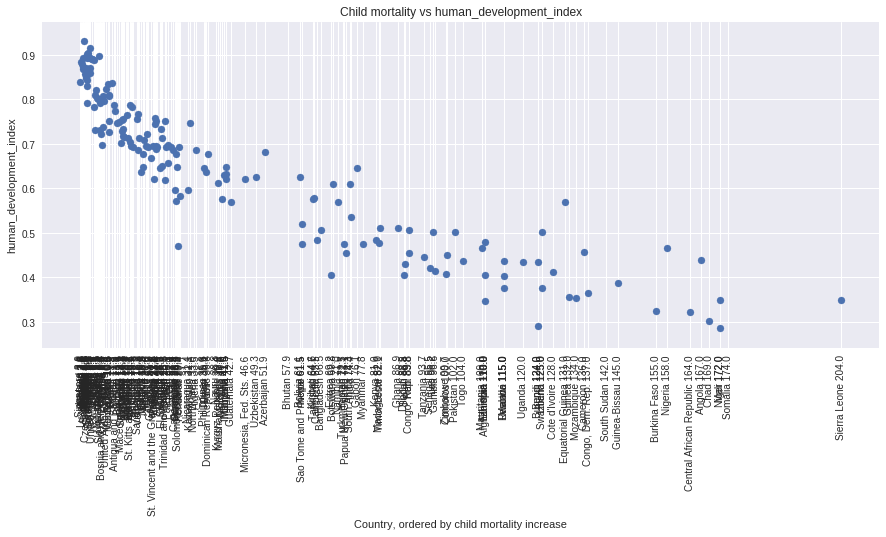

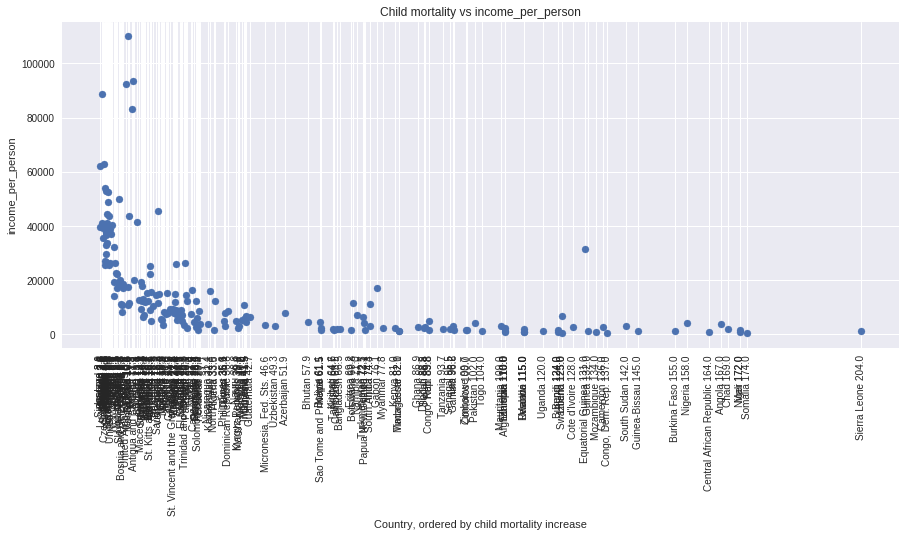

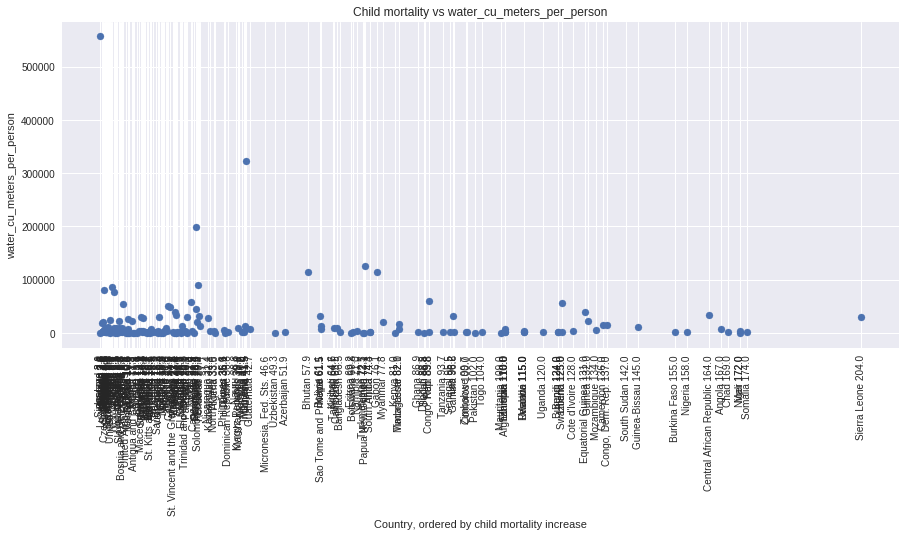

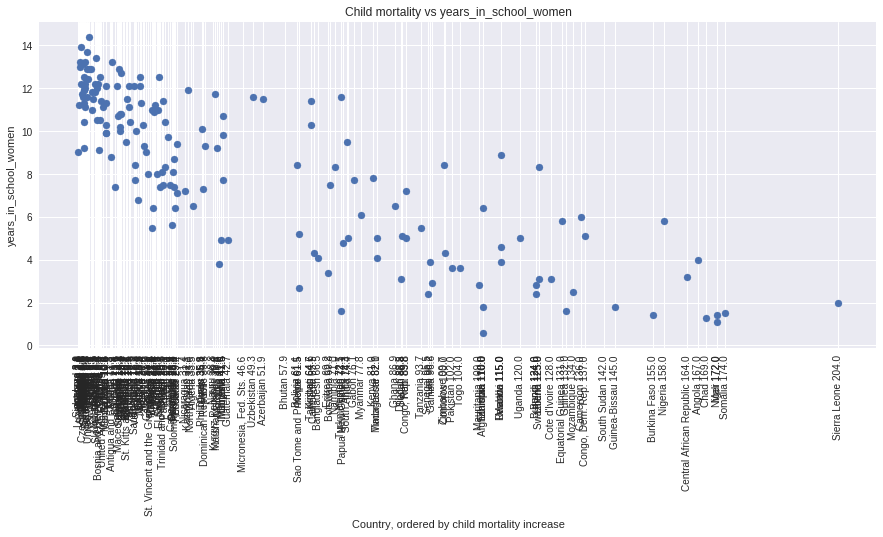

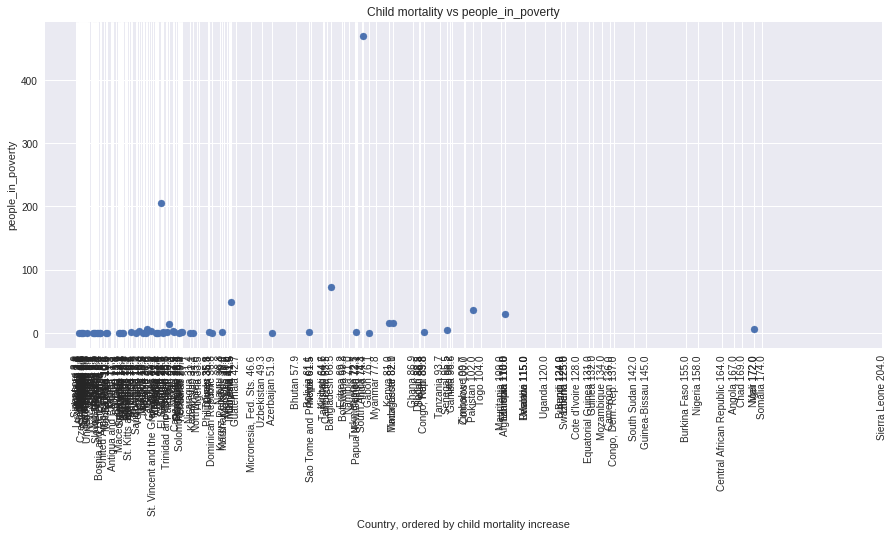

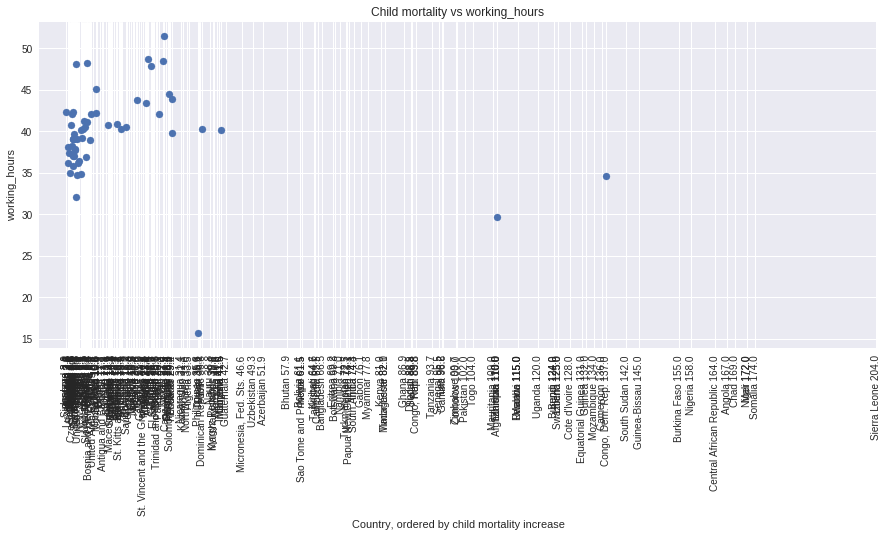

In [81]:

def plot_mortality_vs(indicator, mortality_above=0, mortality_under=300):
  df = df_all.query("mortality >= @mortality_above and mortality < @mortality_under");
  #df.head(1)
  #df["country_mortality"] = df["country"] + ' ' + df["mortality"].map(str)
  _ = plt.figure(figsize=(15,6), facecolor='w'); # the '_ =' at the begining avoid text output by putting result in _
  _ = plt.scatter(x=df['mortality'] , y=df[indicator]);
  _ = plt.xlabel("Country, ordered by child mortality increase");
  _ = plt.ylabel(indicator);
  _ = plt.title('Child mortality vs ' + indicator);
  _ = plt.xticks(df['mortality'], df['country_mortality'], rotation='vertical');
  plt.show()


for ds in datasets:
  feature = ds[1]
  plot_mortality_vs(feature)
  

Water per person don't seems related to child mortality.

Nor to working hours.

People in poverty is not useful here because it's a number of people. We need to divide it by country population to make it revelant.

Human development index is related but it's not a metric to consider as HDI is itself build from metrics like child mortality.


Now let's zoom into some of the most interesting.

# Child mortality versus Income per person

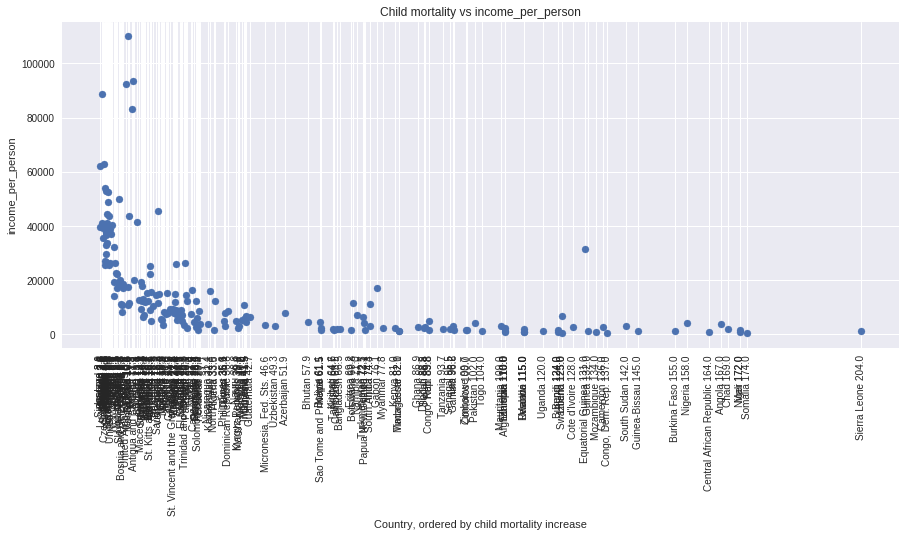

In [82]:
plot_mortality_vs('income_per_person')

We saw that there is a clear relationship between income and child mortality.
We saw also that there is some disparity and we will reduce the value showed to "zoom" into it.

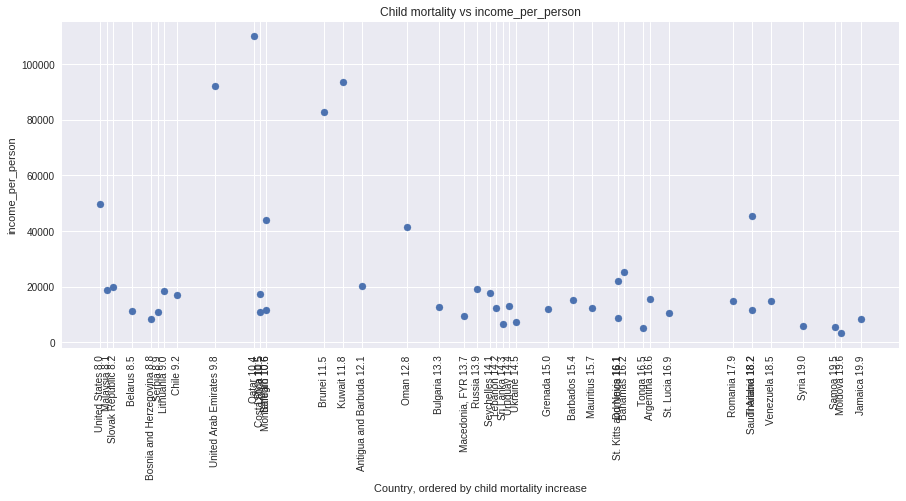

In [83]:
plot_mortality_vs('income_per_person', 8, 20)


United States and Golf country have high child mortality considering their income.

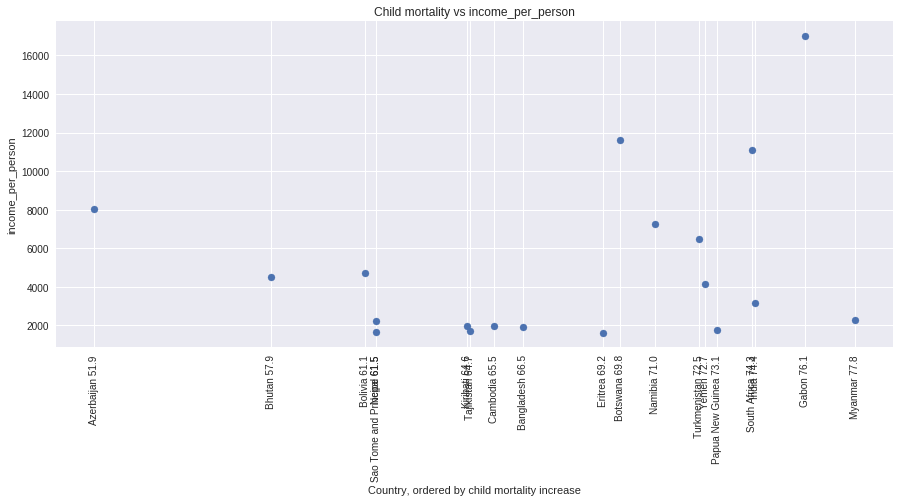

In [84]:
plot_mortality_vs('income_per_person', 50, 80)

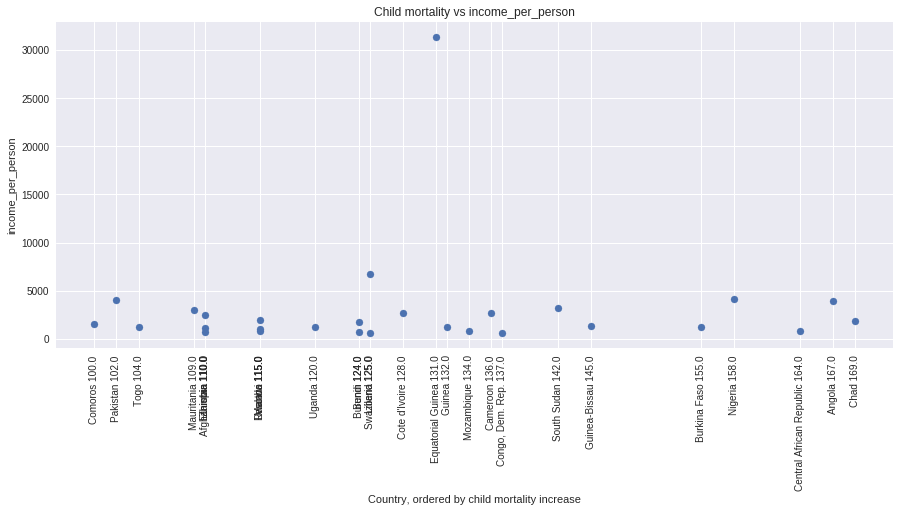

In [85]:
plot_mortality_vs('income_per_person', 100, 170)

Gabon and Equatorial Guinea have also high child mortality compared to their income.
These countries sells petrol but incomes are not redistributed to population and hospital, avoiding children to be saved.

# Child mortality versus children per woman

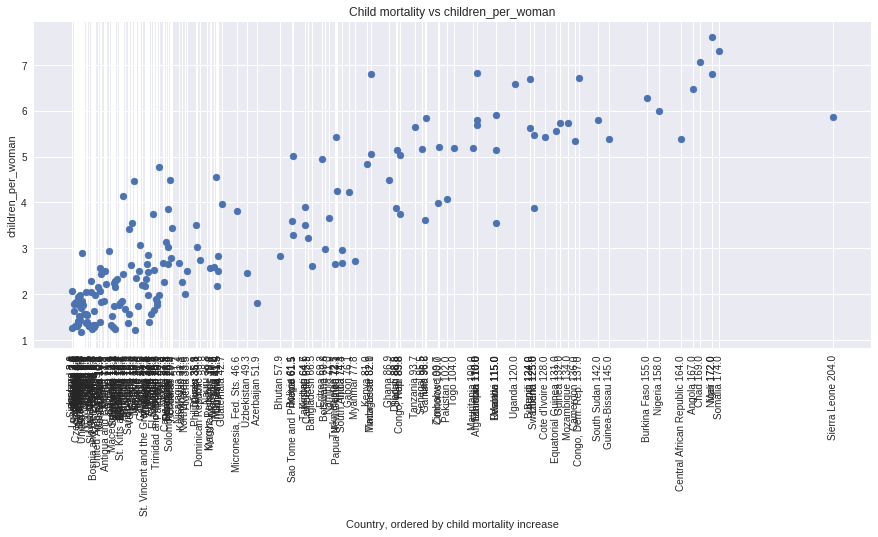

In [97]:
plot_mortality_vs('children_per_woman', 0, 300)

The fact that there is a corelation between these metrics is not surprising : when women knows that more of their children will die they tend to have more chilren.

These corelation is less true when mortality is below 30/1 000.

# Child mortality versus first mariage

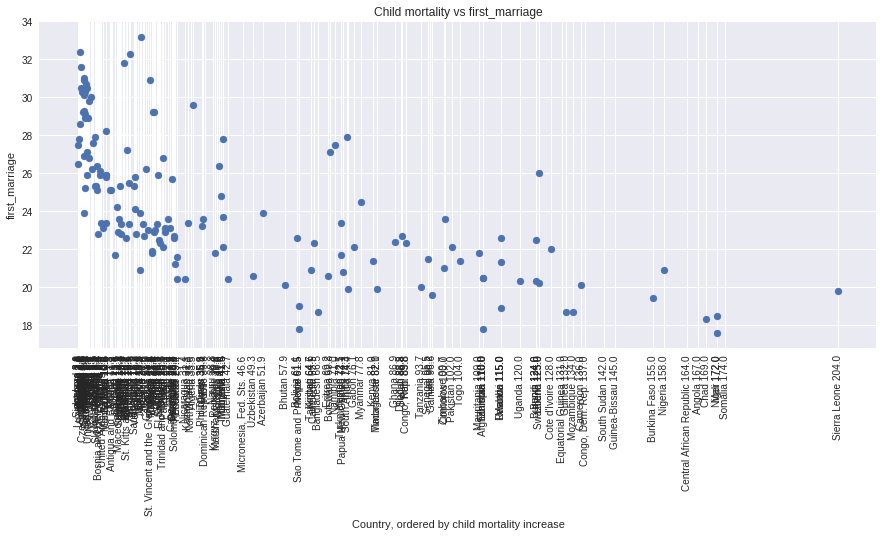

In [98]:
plot_mortality_vs('first_marriage', 0, 300)

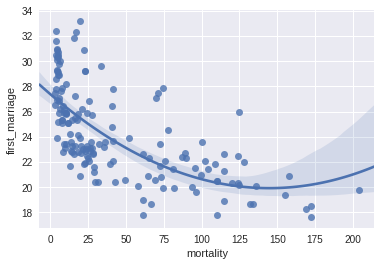

In [104]:
sns.regplot(x='mortality', y='first_marriage', data=df_all, order=2);

There is a correlation between the two metrics, with some exceptions. But "correlation does not imply causation" is a think to keep in mind. It just mean the causality for the two metrics is maybe the same.

# Child mortality versus years in school


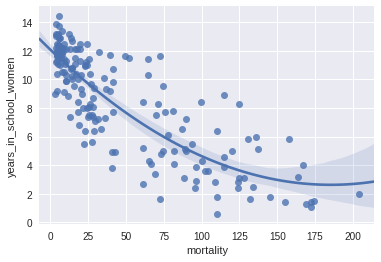

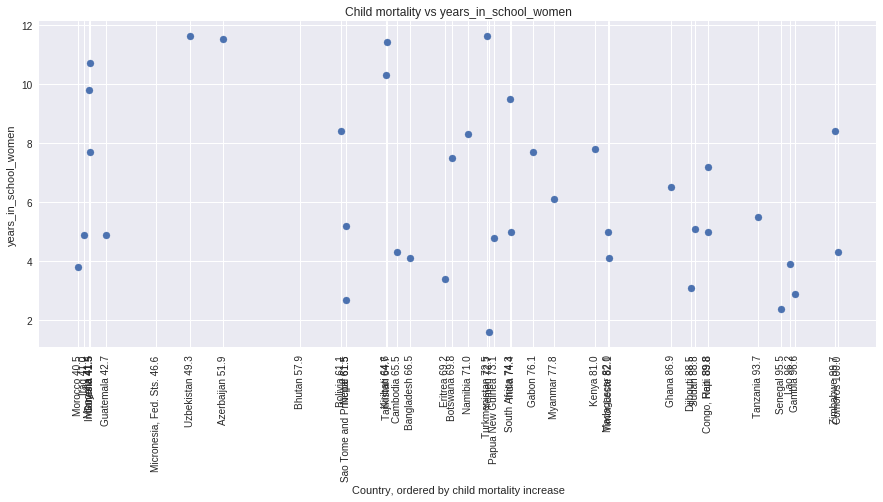

In [109]:
sns.regplot(x='mortality', y='years_in_school_women', data=df_all, order=2);
plot_mortality_vs('years_in_school_women', 40, 102)

There is a correlation, but some countries, like Morocco, shows that they have a relatively low mortality with few years in school.

While in Zimbabwe women goes twice in school than in Morocco but their children died more than twice often.

We could imagine that the mortality is not related to education of women, but more on health investment of the country.

Let's have a look at health expense per capita.

Countries with lowest  health_xpd_pc :
              country  health_xpd_pc
115           Myanmar           5.19
38   Congo, Dem. Rep.           6.59
55           Ethiopia           6.62
13         Bangladesh          11.30
67             Guinea          13.70
Countries with highest  health_xpd_pc :
           country  health_xpd_pc
73         Iceland         5200.0
124         Norway         5580.0
162    Switzerland         5640.0
96      Luxembourg         5820.0
179  United States         6450.0
Summary of data :
       health_xpd_pc
count     186.000000
mean      723.333333
std      1293.753957
min         5.190000
25%        42.475000
50%       174.000000
75%       561.250000
max      6450.000000


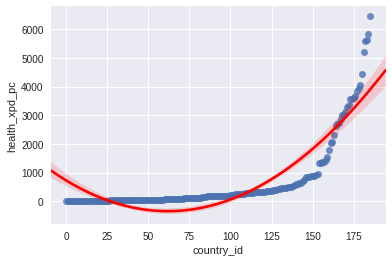

In [112]:
# Health expediture per capita (USD)
df_health = pd.read_csv("gdrive/My Drive/Udacity/sh_xpd_chex_pc_cd.csv", sep=',', index_col=False, )
df_health = prepare_data(df_health, 'health_xpd_pc', show_stat = True)


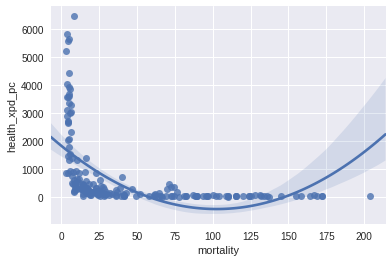

In [113]:
df = df_health
df = df.drop('country_id', axis=1)
df = df.set_index('country')
df_all = df_all.join(df)


sns.regplot(x='mortality', y='health_xpd_pc', data=df_all, order=2);

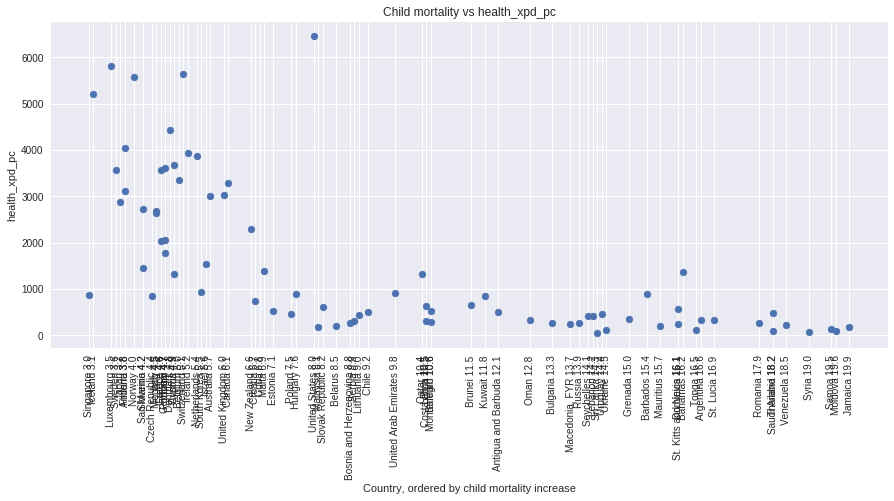

In [118]:
plot_mortality_vs('health_xpd_pc', 0, 20)

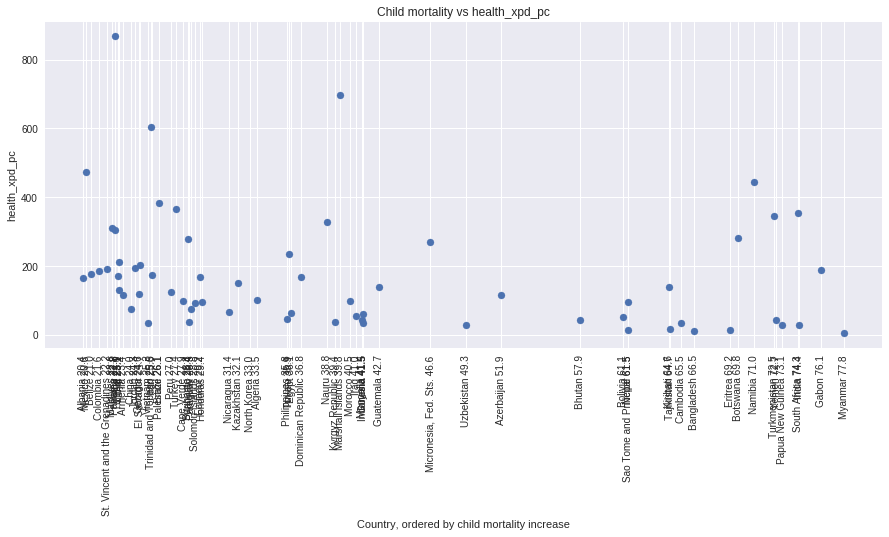

In [116]:
plot_mortality_vs('health_xpd_pc', 20, 81)

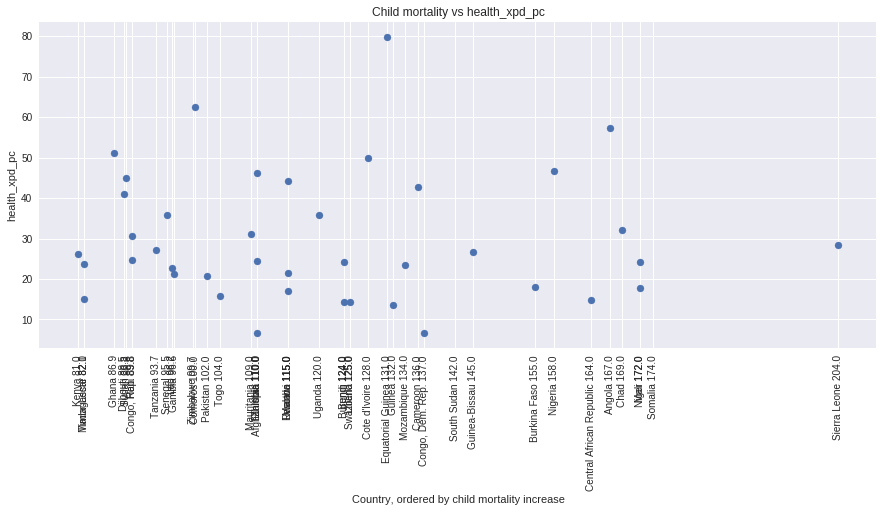

In [117]:
plot_mortality_vs('health_xpd_pc', 81, 300)

It's not clear at all, let's try with another metrics : the birth made by professional.


Countries with lowest  birth_pro :
      country  birth_pro
55   Ethiopia        5.7
88        Lao       14.6
125  Pakistan       31.0
26    Burundi       31.8
66     Guinea       38.0
Countries with highest  birth_pro :
        country  birth_pro
13     Barbados      100.0
180  Uzbekistan      100.0
89       Latvia      100.0
94    Lithuania      100.0
135       Qatar      100.0
Summary of data :
        birth_pro
count  102.000000
mean    89.292157
std     20.711726
min      5.700000
25%     91.700000
50%     98.700000
75%     99.700000
max    100.000000


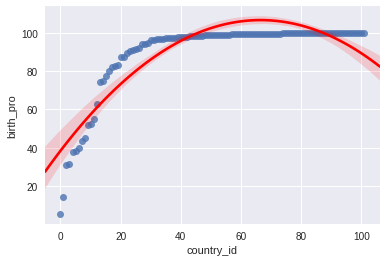

In [119]:
# sh_sta_brtc_zs.csv : Birth made by professional ratio
df_birth = pd.read_csv("gdrive/My Drive/Udacity/sh_sta_brtc_zs.csv", sep=',', index_col=False, )
df_birth = prepare_data(df_birth, 'birth_pro', show_stat = True)


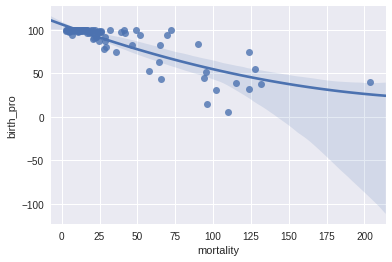

In [120]:
df = df_birth
df = df.drop('country_id', axis=1)
df = df.set_index('country')
df_all = df_all.join(df)


sns.regplot(x='mortality', y='birth_pro', data=df_all, order=2);

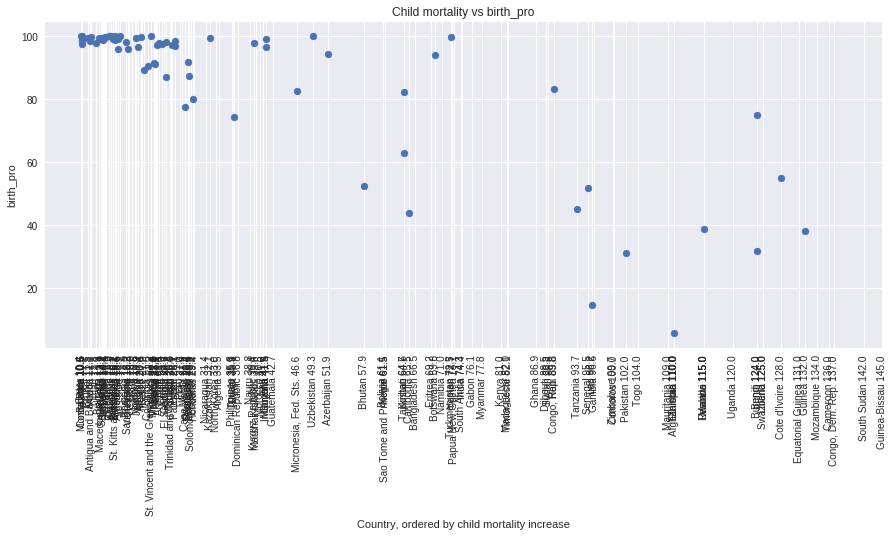

In [122]:
plot_mortality_vs('birth_pro', 10, 150)

Still not clear relationship, investing in pediatric hospital is not a guaranty of low child mortality.

Let's see with vaccin.
I found only vacin for Tetanus data but we could expected it will be related to another vaccin.

Countries with lowest  tetanus :
                     country  tetanus
42                     Haiti     37.0
51                  Kiribati     45.0
85                   Somalia     47.0
19  Central African Republic     48.0
53                       Lao     50.0
Countries with highest  tetanus :
        country  tetanus
59     Maldives     94.0
8         Benin     95.0
0   Afghanistan     96.0
5       Bahrain     97.0
82   Seychelles    100.0
Summary of data :
          tetanus
count  103.000000
mean    76.495146
std     13.635934
min     37.000000
25%     67.000000
50%     80.000000
75%     87.000000
max    100.000000


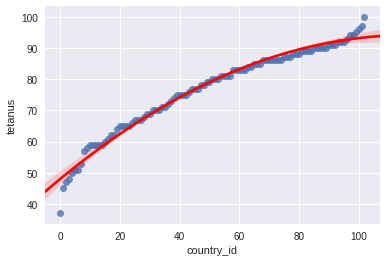

In [124]:
# sh_vac_ttns_zs.csv : Child protected agains tetanus
df_tetanus = pd.read_csv("gdrive/My Drive/Udacity/sh_vac_ttns_zs.csv", sep=',', index_col=False, )
df_tetanus = prepare_data(df_tetanus, 'tetanus', show_stat = True)

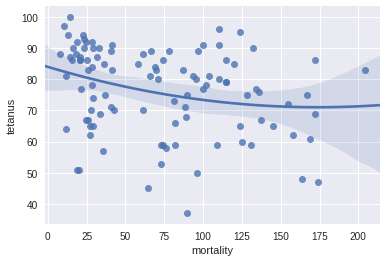

In [125]:
df = df_tetanus
df = df.drop('country_id', axis=1)
df = df.set_index('country')
df_all = df_all.join(df)


sns.regplot(x='mortality', y='tetanus', data=df_all, order=2);

Clearly no relationship.

I was able to find relationship but finding causation is hard. It's seem that, as often, it's not a problem with a one simple solution.

Countries need to invest in hospital, proximity medecine, health care, education and many other things to reduce child mortality.

Some limitations is that I look only to one year and to countries. So countries in war this year have certainly worst mortality.
Maybe I have to compute the mean of all metrics  for all countries and use it to do the exploration. It's another view on the datas. But mean is hard when you saw the standard deviation of some metrics. So working with quantil could ba a solution.